In [3]:
import numpy as np
import math

import scipy

## [Problem 9-3]
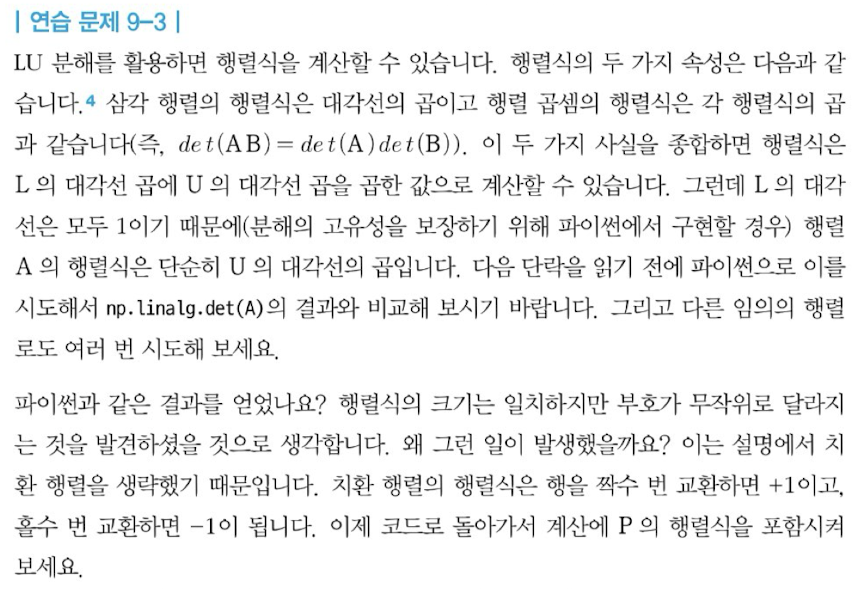

**Properties**
1. $\det(AB) = \det(A) \cdot \det(B)$
2. If X is a triangular matrix, then $\det(A) = \prod_{i} (X_{i,i}) $

In [9]:
def comparison_np_lu(A):
  A = np.random.randn(5,5)
  P, L, U = scipy.linalg.lu(A)
  det_np = np.linalg.det(A)
  det_lu = np.linalg.det(U)
  print(det_np, det_lu)

In [13]:
for i in range(5):
  print(f'{i+1}번째 시행')
  comparison_np_lu(np.random.randn(5,5))
  print()
# 부호가 다르게 나오는 경우가 있지만, 크기는 같다

1번째 시행
7.425028198687733 -7.425028198687733

2번째 시행
-2.845030699228042 -2.845030699228042

3번째 시행
5.277326783780668 -5.277326783780668

4번째 시행
-3.376253225319416 3.376253225319416

5번째 시행
-7.171227556316815 -7.171227556316815



---

In [14]:
# det 계산식에 P를 포함
def comparison_np_lu_2(A):
  A = np.random.randn(5,5)
  P, L, U = scipy.linalg.lu(A)
  det_np = np.linalg.det(A)
  det_lu = np.linalg.det(U) * np.linalg.det(P)
  print(det_np, det_lu)

In [15]:
for i in range(5):
  print(f'{i+1}번째 시행')
  comparison_np_lu_2(np.random.randn(5,5))
  print()
# 부호도 모두 같아진다

1번째 시행
-3.024513774932578 -3.024513774932578

2번째 시행
-18.791379205183674 -18.791379205183674

3번째 시행
15.309501521203096 15.309501521203096

4번째 시행
-0.027305865308711746 -0.027305865308711746

5번째 시행
9.910130932441406 9.910130932441406



## [Problem 9-4]
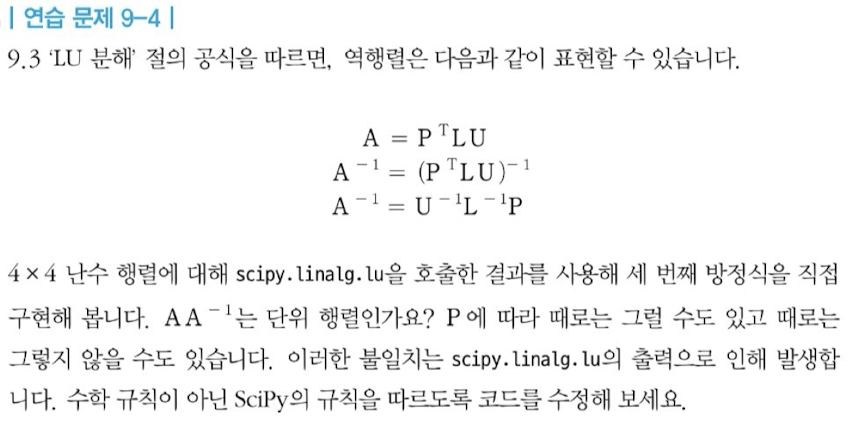

- **교훈**: 에러 메시지가 없다고 해서, 반드시 코드가 정확하다는 게 아니다.

### LU Decompositon
- $A^{-1}= U^{-1}L^{-1}P $

In [33]:
def validation_Ainv(A):
  P, L, U = scipy.linalg.lu(A)
  A_inv = (np.linalg.inv(U) @ np.linalg.inv(L) @ P)

  return P, L, U, A_inv

In [37]:
for i in range(5):
  print(f'******{i+1}번째 시행******')

  A = np.random.randn(4,4)

  P, L, U, A_inv = validation_Ainv(A)

  print(f'A@A_inv:\n {np.round(A@A_inv, 3)}')
  print()

  print(f'이 때 P:\n {P}')
  print()

******1번째 시행******
A@A_inv:
 [[ 1.  0.  0. -0.]
 [-0.  1.  0. -0.]
 [-0. -0.  1.  0.]
 [ 0. -0. -0.  1.]]

이 때 P:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

******2번째 시행******
A@A_inv:
 [[ 0.  1.  0. -0.]
 [ 0. -0.  1.  0.]
 [ 1.  0. -0.  0.]
 [-0. -0.  0.  1.]]

이 때 P:
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

******3번째 시행******
A@A_inv:
 [[-0. -0.  0.  1.]
 [ 1. -0.  0. -0.]
 [ 0.  0.  1. -0.]
 [ 0.  1. -0. -0.]]

이 때 P:
 [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

******4번째 시행******
A@A_inv:
 [[ 1. -0. -0. -0.]
 [ 0.  0. -0.  1.]
 [-0.  1. -0. -0.]
 [ 0.  0.  1.  0.]]

이 때 P:
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]

******5번째 시행******
A@A_inv:
 [[-0.  0.  1. -0.]
 [-0. -0.  0.  1.]
 [ 1.  0. -0.  0.]
 [ 0.  1. -0.  0.]]

이 때 P:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]



- P가 Identity Mat일 떄만 A_inv가 정확하다

### scipy의 로직에 맞게 코드 수정하기
- 실제로 scipy의 LU는 A=PLU를 반환한다.

In [38]:
def validation_Ainv_2(A):
  P, L, U = scipy.linalg.lu(A)
  A_inv = (np.linalg.inv(U) @ np.linalg.inv(L) @ np.linalg.inv(P)) # P를 P_inv로 수정

  return P, L, U, A_inv

In [39]:
for i in range(5):
  print(f'******{i+1}번째 시행******')

  A = np.random.randn(4,4)

  P, L, U, A_inv = validation_Ainv_2(A)

  print(f'A@A_inv:\n {np.round(A@A_inv, 3)}')
  print()

  print(f'이 때 P:\n {P}')
  print()

******1번째 시행******
A@A_inv:
 [[ 1.  0. -0. -0.]
 [ 0.  1.  0.  0.]
 [-0. -0.  1. -0.]
 [ 0. -0.  0.  1.]]

이 때 P:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

******2번째 시행******
A@A_inv:
 [[ 1.  0.  0. -0.]
 [-0.  1.  0. -0.]
 [-0.  0.  1. -0.]
 [-0. -0. -0.  1.]]

이 때 P:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]

******3번째 시행******
A@A_inv:
 [[ 1. -0. -0. -0.]
 [-0.  1. -0. -0.]
 [ 0.  0.  1.  0.]
 [-0. -0. -0.  1.]]

이 때 P:
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

******4번째 시행******
A@A_inv:
 [[ 1. -0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1. -0.]
 [-0.  0. -0.  1.]]

이 때 P:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]

******5번째 시행******
A@A_inv:
 [[ 1.  0.  0. -0.]
 [-0.  1.  0. -0.]
 [ 0.  0.  1. -0.]
 [-0.  0. -0.  1.]]

이 때 P:
 [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]



- P의 값과 상관없이, 모든 경우에 대해서 A_inv가 정확하게 계산된 것을 확인할 수 있음

## [Problem 9-5]
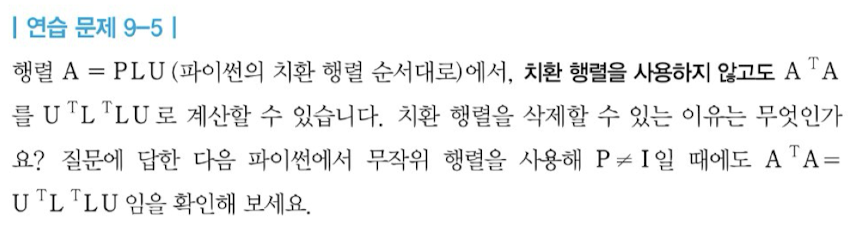

### Permutation matrix(P)를 삭제할 수 있는 이유
$A'A = (PLU)'(PLU) = U'L'P'PLU$
- 여기서 P는 orthogonal matrix이기 때문에 $P'=P^{inv} \quad \therefore P'P = I$

### 구현을 통한 검증

In [40]:
for i in range(5):
  print(f'******{i+1}번째 시행******')

  A = np.random.randn(4,4)

  P, L, U, A_inv = validation_Ainv_2(A)

  print(f"A'A:\n {np.round(A.T@A, 3)}")
  print()

  print(f"U'L'LU:\n {np.round(U.T @ L.T @ L @ U, 3)}")
  print()

  print(f'이 때 P:\n {P}')
  print()

******1번째 시행******
A'A:
 [[ 3.203  3.602 -2.174 -1.687]
 [ 3.602  5.497 -1.993 -0.752]
 [-2.174 -1.993  3.185  3.503]
 [-1.687 -0.752  3.503  5.901]]

U'L'LU:
 [[ 3.203  3.602 -2.174 -1.687]
 [ 3.602  5.497 -1.993 -0.752]
 [-2.174 -1.993  3.185  3.503]
 [-1.687 -0.752  3.503  5.901]]

이 때 P:
 [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

******2번째 시행******
A'A:
 [[ 1.065  0.402 -0.418 -2.147]
 [ 0.402  7.244 -2.012  2.088]
 [-0.418 -2.012  6.033 -3.45 ]
 [-2.147  2.088 -3.45   8.205]]

U'L'LU:
 [[ 1.065  0.402 -0.418 -2.147]
 [ 0.402  7.244 -2.012  2.088]
 [-0.418 -2.012  6.033 -3.45 ]
 [-2.147  2.088 -3.45   8.205]]

이 때 P:
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

******3번째 시행******
A'A:
 [[ 4.628  0.799  3.02  -1.331]
 [ 0.799  9.483  2.19  -1.544]
 [ 3.02   2.19   5.111  0.56 ]
 [-1.331 -1.544  0.56   1.562]]

U'L'LU:
 [[ 4.628  0.799  3.02  -1.331]
 [ 0.799  9.483  2.19  -1.544]
 [ 3.02   2.19   5.111  0.56 ]
 [-1.331 -1.544  0.56   1.562]]

이 

- $P \neq I$ 일때도, 성립하는 것을 확인할 수 있음

## [Problem 9-2]: 🧐 Shared Problem
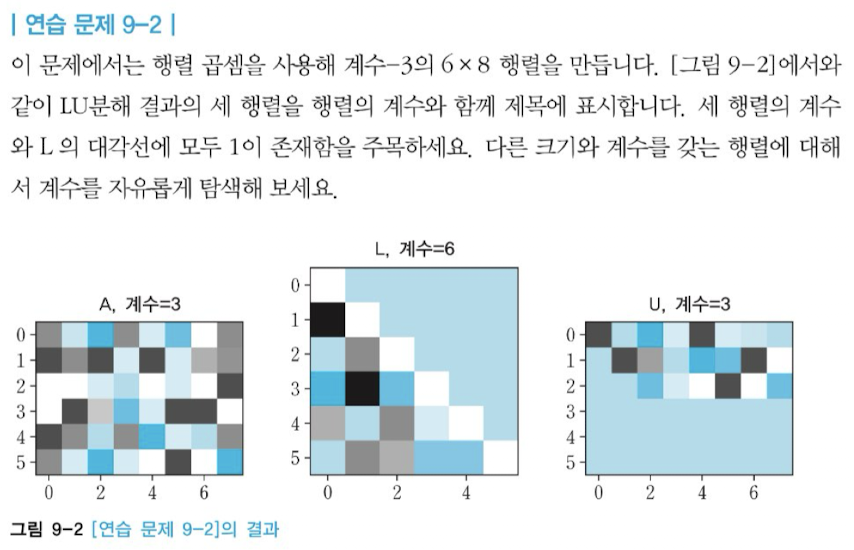

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
def dim_rank_matrix(m, n, r):
  X_1 = np.random.randn(m, r)
  X_2 = np.random.randn(r, n)

  # (1) rank가 r인 m x n 크기의 행렬 생성
  matrix = np.dot(X_1, X_2)

  P, L, U = scipy.linalg.lu(matrix)


  # (2) 시각화
  # 행렬을 리스트로 저장
  matrices = [matrix, L, U]
  matrices_name = ['A', 'L', 'U']

  # 시각화 설정
  fig, axes = plt.subplots(1, len(matrices), figsize=(15, 5))

  for i, matrix in enumerate(matrices):
      sns.heatmap(matrix, ax=axes[i], annot=True, fmt=".2f", cmap="YlGnBu")
      axes[i].set_title(f"{matrices_name[i]}, Rank = {np.linalg.matrix_rank(matrices[i])}")

  plt.tight_layout()
  plt.show()

  return

### 시각화 1: Tall matrix (dim: 6x8, r=3)

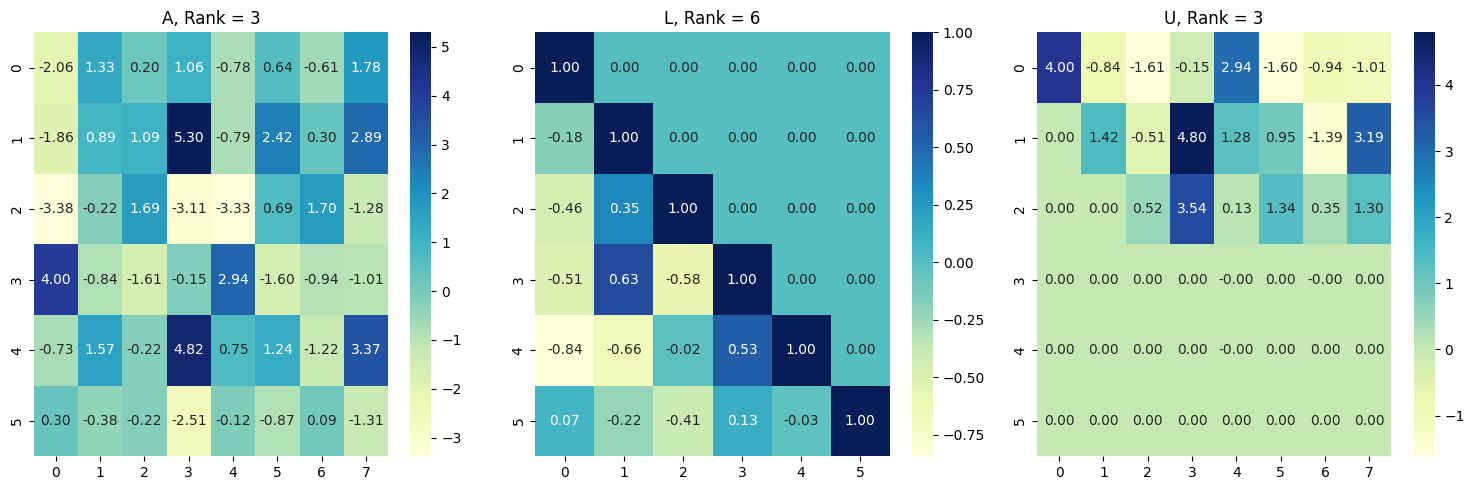

In [63]:
dim_rank_matrix(m=6, n=8, r=3)

### 시각화 2: Tall matrix (dim: 4x3, r=3)

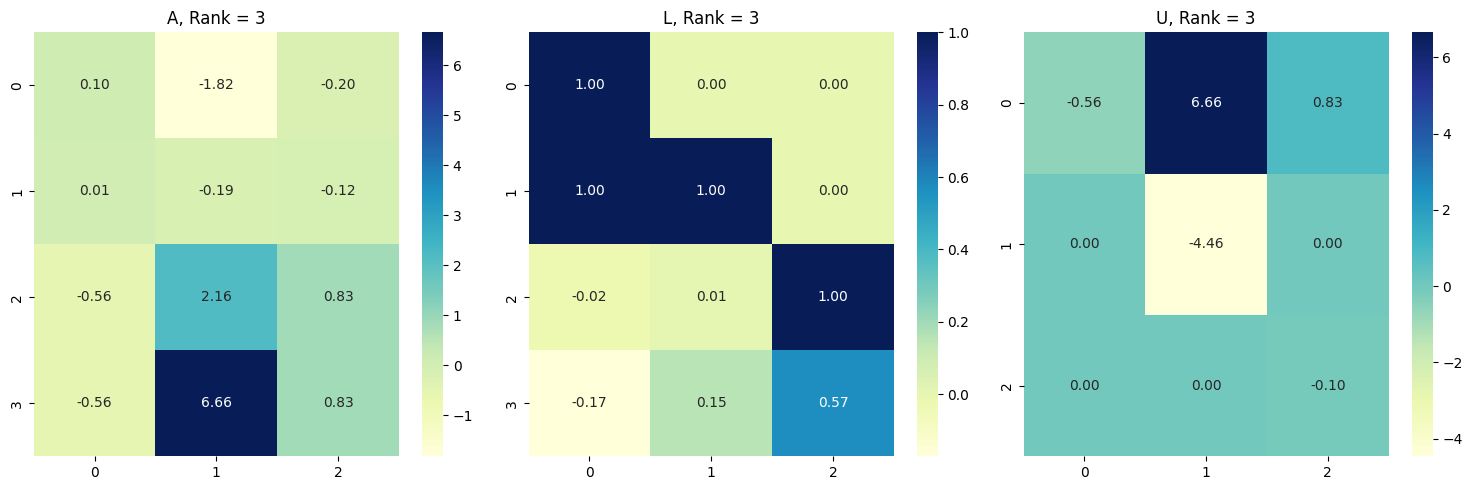

In [64]:
dim_rank_matrix(m=4, n=3, r=3)

### 시각화 3: Wide matrix (dim: 3x4, r=3)

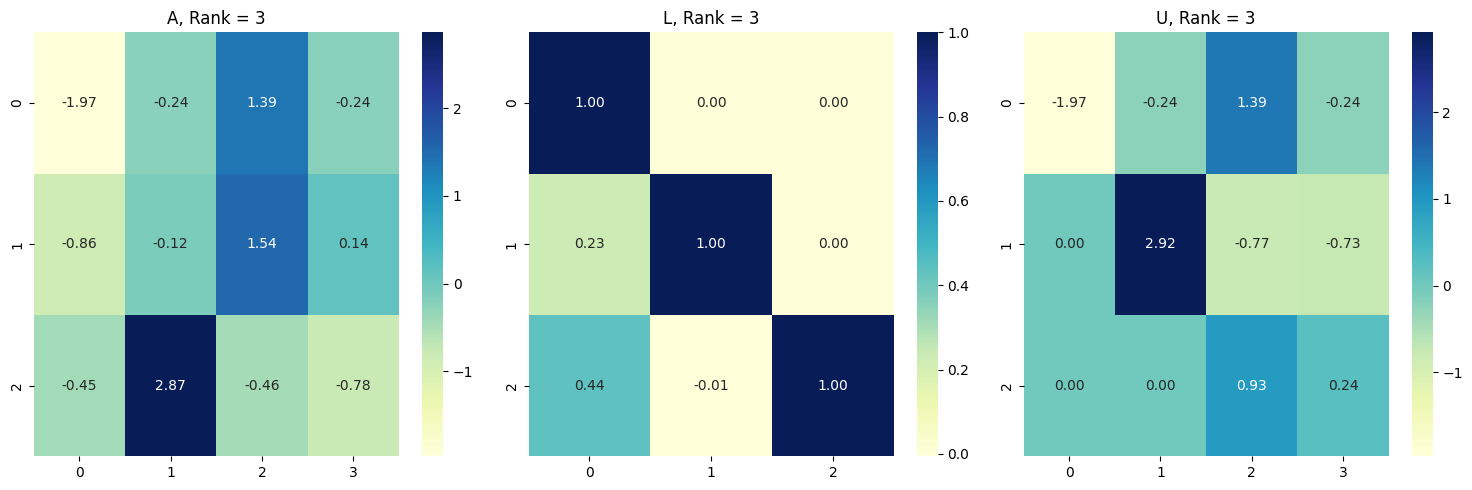

In [65]:
dim_rank_matrix(m=3, n=4, r=3)

### 시각화 4: Square matrix - non-singular (dim: 3x3, r=3)

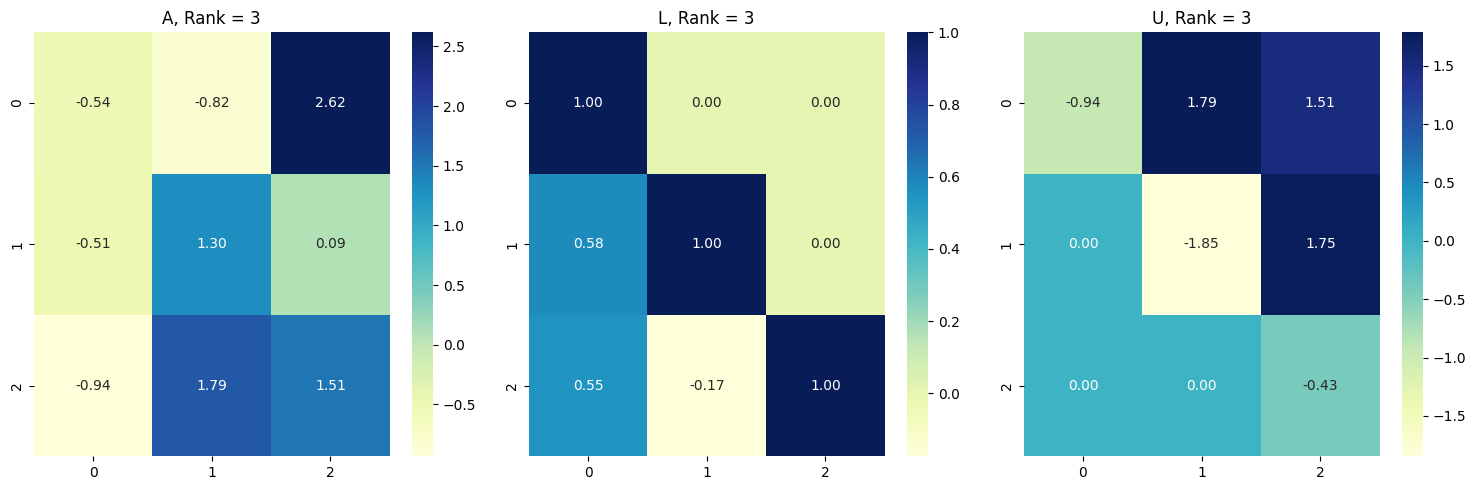

In [66]:
dim_rank_matrix(m=3, n=3, r=3)

### 시각화 5: Square matrix - singular (dim: 3x3, r=3)

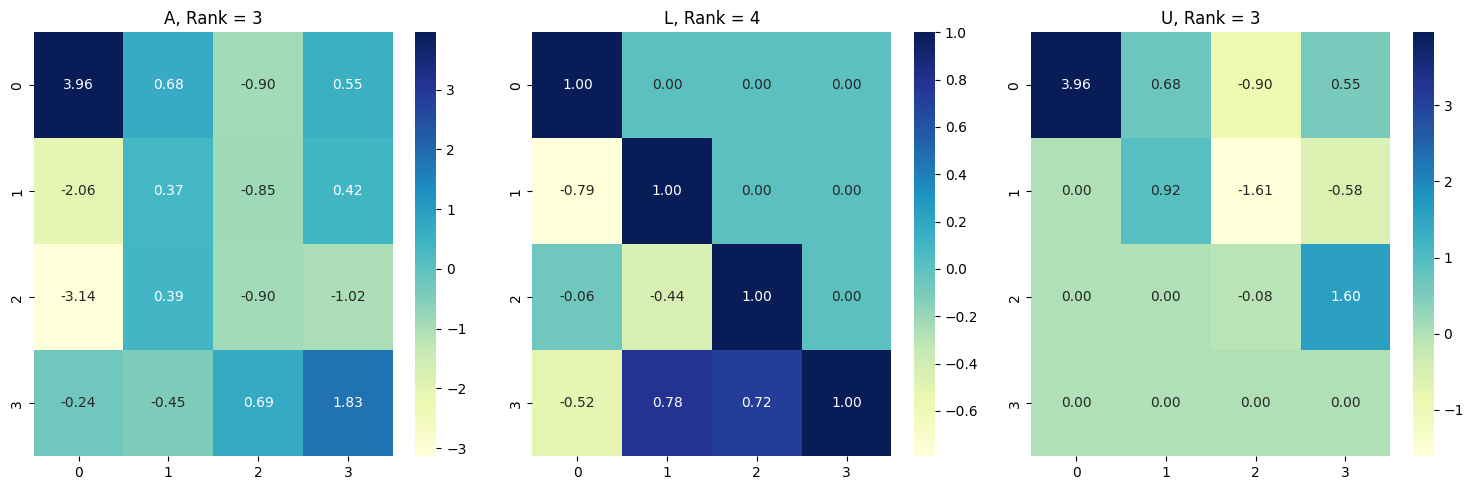

In [67]:
dim_rank_matrix(m=4, n=4, r=3)

## Problem 9-2 해석

### 1. **L의 대각 원소가 모두 1인 이유**

- LU 분해는 무한한 형태로 가능함. 따라서, Unique한 LU 분해를 위해서 L의 대각원소를 1로 고정

---

### 2. L과 U의 **Dimension**

#### **2-1. A가 Square Matrix인 경우**:

- **L**: n×n 크기의 lower-triangular matrix로, 대각선에 모두 1이 위치합니다.

- **U**: n×n 크기의 upper-triangular matrix로, 대각선 상단에 값이 채워집니다.

---

#### **2-2. A가 Non-Square Matrix인 경우**:

##### 예시 1: Tall matrix(m>n)인 경우 (행의 수가 열의 수보다 많은 경우)
> 행렬 A가 m×n이고 m>n일 때,:

- L: L은 m×n 크기의 사다리꼴 형태의 하삼각 행렬이 됩니다.
  - L의 크기는 행렬 A와 같은 행 수 m을 가지지만, 열 수는 n으로 제한됩니다.
- U: U는 n×n 크기의 정방 상삼각 행렬이 됩니다.

- 예를 들어, 행렬 A가 6x4 크기라면, L은 6x4, U는 4x4 크기가 됩니다.
---

##### 예시 2: Wide matrix(m<n)인 경우 (행의 수가 열의 수보다 많은 경우)
> 행렬 A가 m×n이고 m<n일 때,:

- L: L은 m×m 크기의 **정방 하삼각 행렬**이 됩니다.

- U: U는 m×n 크기의 **사다리꼴 형태의 상삼각 행렬**이 됩니다.

- 예를 들어, 행렬 A가 4x6 크기라면, L은 4x4, U는 4x6 크기가 됩니다.

---

### 3. L과 U의 **Rank**

#### 3-1: A가 Square

> A가 정방 행렬이라면 LU 분해가 가능하려면 정칙 행렬 (invertible matrix) 이어야 하며, 이 경우 rank는 행렬의 차원과 같습니다.

- 예를 들어, A가 n×n인 경우, A가 invertible matrix라면 rank는 n

- **LU 분해 결과로 얻은 L과 U도 각각 rank n**

---
> 그러나, A가 정칙이 아닌 경우 (singular),
>
> - 예를 들어 rank가 r<n이라면, LU 분해가 제대로 수행되지 않으며, P 행렬(교환 행렬)을 추가하여 PA=LU 형태로 분해해야 함.

- 이 경우: L과 U는 rank r을 가지며, 둘 중 하나에는 **row or column of zeros**가 생길 수 있음

---

#### 3-2: A가 Non-Square

(1) Tall matrix인 경우,
> rank는 최대 n까지 가능
- 만약 A의 rank가 r이라면, **분해된 L과 U도 rank r**을 가지게 됨.

(2) Wide matrix인 경우,
> rank는 최대 m까지 가능
- 만약 A의 rank가 r이라면, **분해된 L과 U도 rank r**을 가지게 됨.